# <b>Topic Modeling(LDA)</b>

In [ ]:
import pandas as pd
import gensim

#데이터 불러오기 
df = pd.read_csv("../Preprocessed_Content/전체/전체_combined.csv")
#df = pd.read_csv("../Preprocessed_Content/전체/기독교_combined.csv")
#df = pd.read_csv("../Preprocessed_Content/전체/천주교_combined.csv")
#df = pd.read_csv("../Preprocessed_Content/전체/불교_combined.csv")



In [71]:
df.shape

(14548, 4)

In [75]:
all_content = ' '.join(df['pre_body'])  # 전체 텍스트 합치기
token_count = len(all_content.split())  # 띄어쓰기 기준 단어 개수
print(token_count)


3102994


In [76]:
# LDA분석 위해 공백단위로 단어 나눠서 리스트형태로 반환
df['split_body'] = df['pre_body'].apply(lambda x: x.split()) 

In [ ]:
from gensim import corpora

# 토큰 단어와 gensim 내부 아이디 매칭
word_dict = corpora.Dictionary(df['split_body'])
# 너무 많이 등장하거나 적게 등장하는 단어 제거
word_dict.filter_extremes(no_below=10, no_above=0.5, keep_n=None)

# doc2bow 메서드 -> 문서를 BOW(Bag of word)형식으로 변환 = corpus 생성
corpus = [word_dict.doc2bow(tokens) for tokens in df['split_body']]


In [89]:
len(word_dict)

15385

In [90]:
#LDA 단어 - 숫자 매핑한 값 출력
[(idx,word) for idx, word in word_dict.items()]

[(0, '가능'),
 (1, '간담회'),
 (2, '감염증'),
 (3, '강화'),
 (4, '개신교'),
 (5, '거리'),
 (6, '결정'),
 (7, '경우'),
 (8, '공유'),
 (9, '교단'),
 (10, '교총'),
 (11, '교회'),
 (12, '구현'),
 (13, '국내'),
 (14, '규모'),
 (15, '그리스도인'),
 (16, '극복'),
 (17, '기념'),
 (18, '기자'),
 (19, '김민호'),
 (20, '노래'),
 (21, '녹음'),
 (22, '다음'),
 (23, '다짐'),
 (24, '단계'),
 (25, '단상'),
 (26, '단체'),
 (27, '달'),
 (28, '닷컴'),
 (29, '당면'),
 (30, '대신'),
 (31, '대표'),
 (32, '동원'),
 (33, '등록'),
 (34, '뜻'),
 (35, '마스크'),
 (36, '만찬'),
 (37, '먼저'),
 (38, '목사'),
 (39, '발언'),
 (40, '방법'),
 (41, '방송'),
 (42, '방역'),
 (43, '방침'),
 (44, '배'),
 (45, '변'),
 (46, '병원'),
 (47, '봉헌'),
 (48, '부활'),
 (49, '부활절'),
 (50, '사랑의교회'),
 (51, '사무총장'),
 (52, '사이'),
 (53, '사전'),
 (54, '사회'),
 (55, '산하'),
 (56, '삶'),
 (57, '생략'),
 (58, '서울'),
 (59, '서울광장'),
 (60, '서초구'),
 (61, '설명'),
 (62, '성'),
 (63, '성사'),
 (64, '성찰'),
 (65, '소강석'),
 (66, '소독'),
 (67, '소변'),
 (68, '수술'),
 (69, '시간'),
 (70, '신자'),
 (71, '신종'),
 (72, '아버지'),
 (73, '안전'),
 (74, '역'),
 (75, '연락처'),
 (76, '연세

- Coherence 점수를 기준으로 토픽의 개수 선정

k = 5, Coherence Score: 0.5583
k = 6, Coherence Score: 0.5752
k = 7, Coherence Score: 0.5369
k = 8, Coherence Score: 0.5598
k = 9, Coherence Score: 0.5465
k = 10, Coherence Score: 0.5858
k = 11, Coherence Score: 0.5845
k = 12, Coherence Score: 0.5883
k = 13, Coherence Score: 0.5960
k = 14, Coherence Score: 0.5955
k = 15, Coherence Score: 0.5653
k = 16, Coherence Score: 0.5794
k = 17, Coherence Score: 0.5931
k = 18, Coherence Score: 0.5896
k = 19, Coherence Score: 0.6014
k = 20, Coherence Score: 0.6128
k = 21, Coherence Score: 0.6195
k = 22, Coherence Score: 0.5992
k = 23, Coherence Score: 0.5966
k = 24, Coherence Score: 0.5845
k = 25, Coherence Score: 0.6102
k = 26, Coherence Score: 0.5850
k = 27, Coherence Score: 0.6008
k = 28, Coherence Score: 0.6169
k = 29, Coherence Score: 0.6127


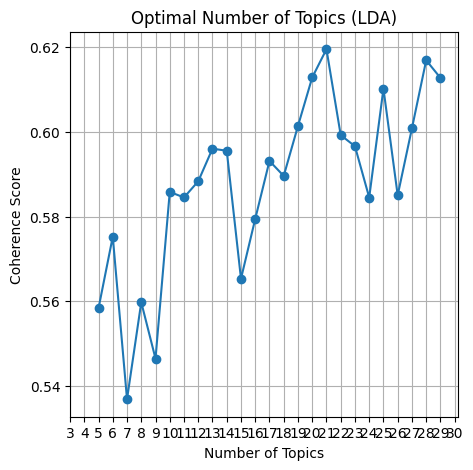

In [93]:
import gensim
from gensim.models import CoherenceModel
import pandas as pd
import matplotlib.pyplot as plt

coherence_score = []

# 최적 토픽 개수 찾기 (7~15개)
for i in range(5, 30):  
    model = gensim.models.ldamodel.LdaModel(
        corpus=corpus, 
        id2word=word_dict, 
        num_topics=i, 
        passes=10,  # 학습 횟수 증가
        random_state=42  # 결과 일관성을 위한 설정
    )
    
    # Coherence Score 계산
    coherence_model = CoherenceModel(model, texts=df['split_body'], dictionary=word_dict, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    
    print(f'k = {i}, Coherence Score: {coherence_lda:.4f}')
    coherence_score.append((i, coherence_lda))

# 결과를 DataFrame으로 저장
df_coherence = pd.DataFrame(coherence_score, columns=["num_topics", "coherence_score"])

# 그래프 시각화
plt.figure(figsize=(5, 5))
plt.plot(df_coherence["num_topics"], df_coherence["coherence_score"], marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics (LDA)")
plt.xticks(range(3, 31))
plt.grid()
plt.show()

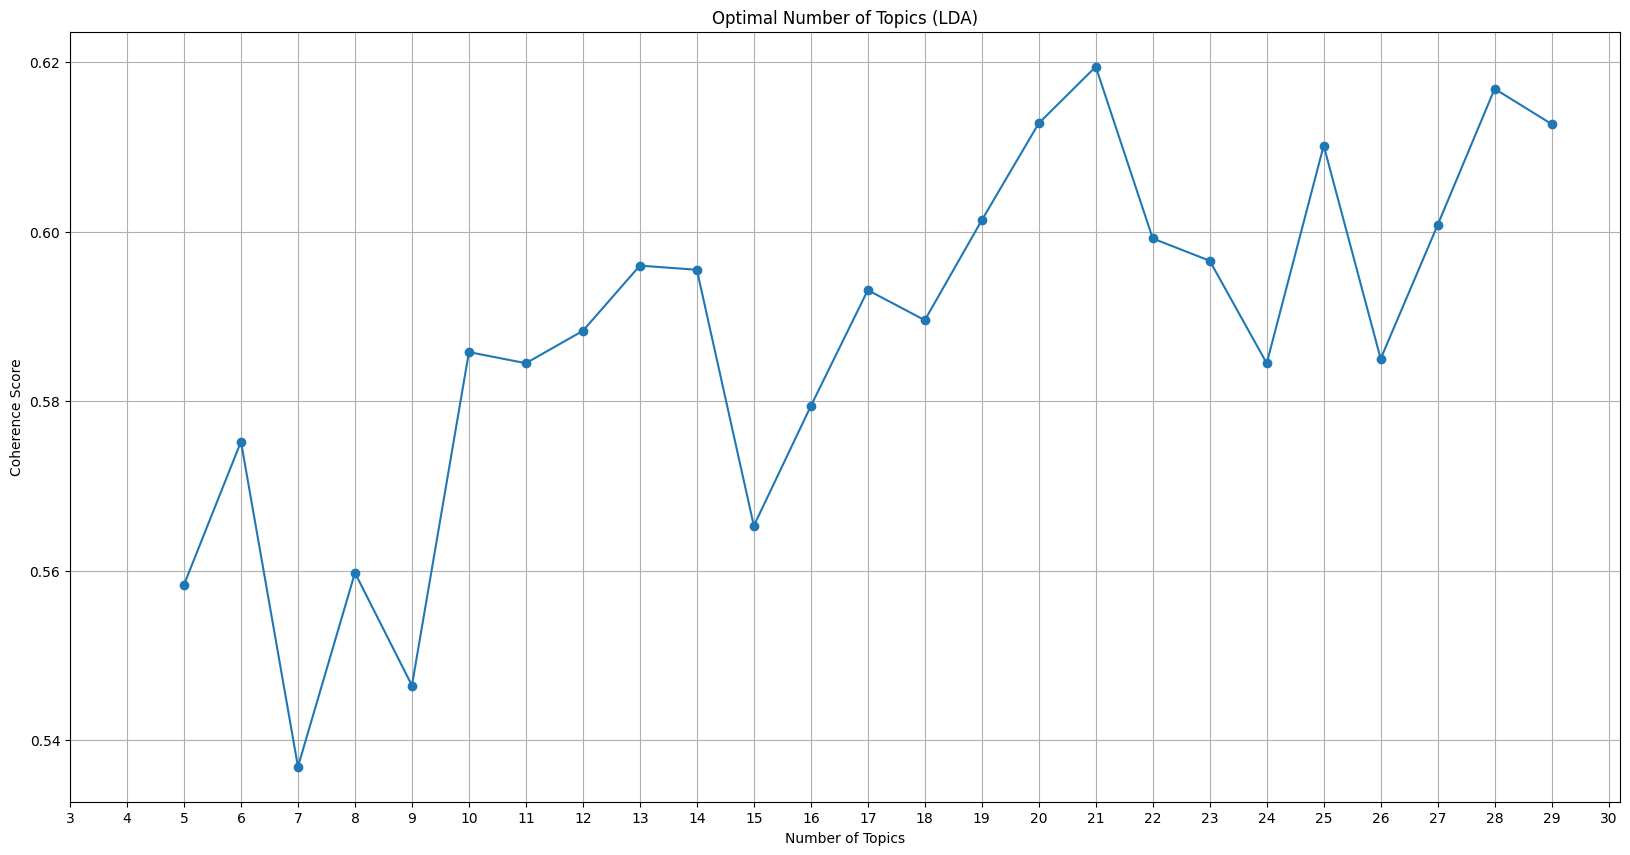

In [ ]:
#그래프 시각화

plt.figure(figsize=(20, 10))
plt.plot(df_coherence["num_topics"], df_coherence["coherence_score"], marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics (LDA)")
plt.xticks(range(3, 31))
plt.grid()
plt.show()

In [103]:
# N_TOPICS 개의 주요토픽으로 뉴스데이터 분류

N_TOPICS = 21
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                            passes=5,
                                           num_topics = N_TOPICS, 
                                           id2word=word_dict)

In [107]:
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, word_dict)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [119]:
import numpy as np

# 각 토픽이 전체 문서에서 차지하는 비율 계산
topic_importance = np.zeros(ldamodel.num_topics)  # 초기화

# 전체 코퍼스를 순회하며 문서별 토픽 비율을 누적하여 계산
for doc in corpus:
    for topic_id, prob in ldamodel.get_document_topics(doc):
        topic_importance[topic_id] += prob

# 토픽 중요도를 기준으로 내림차순 정렬
sorted_topics = np.argsort(-topic_importance)

# 정렬된 순서에 맞춰 주요 단어 출력
sorted_topic_terms = {i: ldamodel.show_topic(topic_id, topn=10) for i, topic_id in enumerate(sorted_topics)}

# 최종적으로 pyLDAvis와 맞춘 순서로 출력
for i, topic_id in enumerate(sorted_topics):

    print(f'{i+1}번째 문서의 topic 비중: {sorted_topic_terms[i]}')
    print("-" * 250)

    if i==21:
        break



1번째 문서의 topic 비중: [('하느님', 0.022063367), ('예수', 0.01614007), ('생각', 0.013836105), ('사랑', 0.013232653), ('삶', 0.013201834), ('자신', 0.012652143), ('마음', 0.011610512), ('기도', 0.011144012), ('하나님', 0.010461168), ('세상', 0.0097171115)]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2번째 문서의 topic 비중: [('불교', 0.06275351), ('스님', 0.06236105), ('부처', 0.032654535), ('승려', 0.02518858), ('사찰', 0.021557642), ('조계종', 0.019095495), ('날', 0.013205689), ('서울', 0.010586564), ('총무원장', 0.009951132), ('마음', 0.009831972)]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
3번째 문서의 topic 비중: [('천주교', 0.05059496), 

In [ ]:
# 각 문서들이 어떤 토픽들의 조합으로 되어 있는지 확인
for i, topic_list in enumerate(ldamodel[corpus]):
    print(f'{i+1}번째 문서의 topic 비중: {topic_list}')
    if i==10:
        break

1번째 문서의 topic 비중: [(5, 0.04395501), (7, 0.12254959), (8, 0.6117016), (11, 0.0377788), (13, 0.016265882), (15, 0.074094556), (17, 0.05926322), (20, 0.02488656)]
2번째 문서의 topic 비중: [(0, 0.029151205), (6, 0.2927122), (7, 0.16882055), (10, 0.08485141), (15, 0.4215757)]
3번째 문서의 topic 비중: [(0, 0.01396436), (1, 0.062402707), (4, 0.04703405), (8, 0.2489295), (15, 0.34280515), (16, 0.25567782), (17, 0.010109701), (20, 0.015744196)]
4번째 문서의 topic 비중: [(4, 0.1419833), (6, 0.10525263), (8, 0.032172583), (10, 0.17509581), (12, 0.021145603), (13, 0.094585784), (15, 0.36269552), (16, 0.026682593), (18, 0.03866819)]
5번째 문서의 topic 비중: [(1, 0.025315749), (7, 0.0658046), (8, 0.31441247), (9, 0.093226545), (10, 0.047362346), (11, 0.048070367), (15, 0.4020162)]
6번째 문서의 topic 비중: [(0, 0.16865136), (6, 0.08495005), (7, 0.013372352), (9, 0.013976005), (13, 0.3458338), (15, 0.30478963), (19, 0.058152966)]
7번째 문서의 topic 비중: [(1, 0.025963314), (4, 0.020546364), (8, 0.2289052), (10, 0.34483626), (13, 0.07165784), 